In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
%matplotlib inline
import numpy as np

hourly = pickle.load(open('hourly_freq.p','rb'))
crime_type = pickle.load(open('crime_type.p','rb'))
crime_cat= pickle.load(open('crime_cat.p','rb'))

df = np.load('daily_frequency.npy')

man = np.load('MANHATTAN.npy')
bronx = np.load('BRONX.npy')
brook = np.load('BROOKLYN.npy')
staten = np.load('STATEN ISLAND.npy')
queens = np.load('QUEENS.npy')

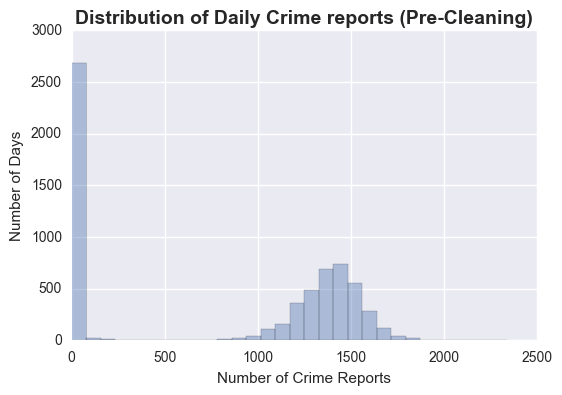

In [4]:
#Daily distribuiton of crime

ax = sns.distplot(df,  kde=False ,bins=30)
ax.set_title('Distribution of Daily Crime reports (Pre-Cleaning)', fontsize=14, fontweight='bold')
ax.set_xlabel('Number of Crime Reports')
ax.set_ylabel('Number of Days')

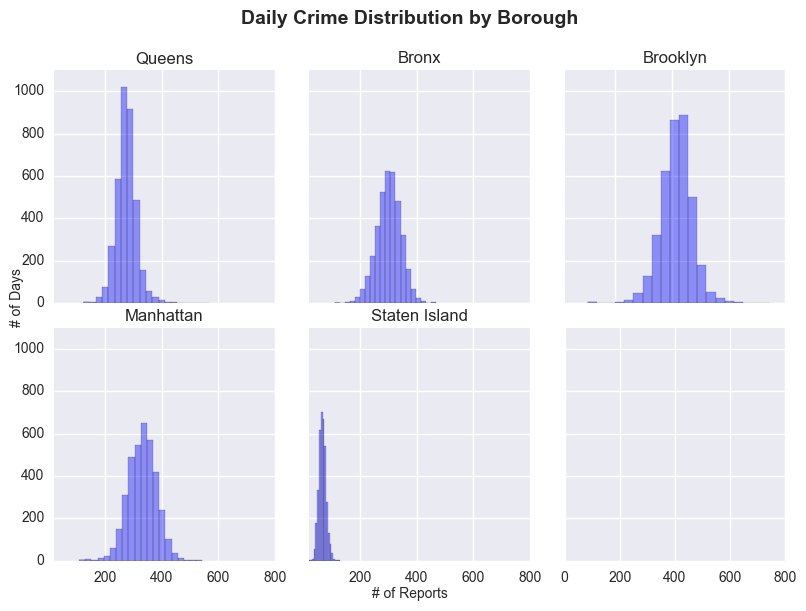

In [5]:
#Distriubtion by burrough

fig, axes = plt.subplots(nrows=2, ncols=3 , sharex=True, sharey=True,figsize=(8,6))

fig.tight_layout()
fig.suptitle('Daily Crime Distribution by Borough',  fontsize=14, fontweight='bold')
fig.subplots_adjust(top=0.88)
fig.text(0.5, 0.0, '# of Reports', ha='center')
fig.text(0.0, 0.5, '# of Days', va='center', rotation='vertical')

for i in range(2):
    for j in range(3):
        axes[i,j].set_xlim([20, 800])
        axes[i,j].set_ylim([0, 1100])
        axes[i,j].set_xticks([200*i for i in range(0,5)])

axes[0,0].set_title('Queens')
axes[0,1].set_title('Bronx')
axes[0,2].set_title('Brooklyn')
axes[1,0].set_title('Manhattan')
axes[1,1].set_title('Staten Island')

sns.distplot(queens[queens >100],  kde=False ,bins=20,color='b',ax=axes[0,0])
sns.distplot(bronx[bronx >100],  kde=False ,bins=20,color='b',ax=axes[0,1])
sns.distplot(brook[brook >100],  kde=False ,bins=20,color='b',ax=axes[0,2])
sns.distplot(man[man >100],  kde=False ,bins=20,color='b',ax=axes[1,0])
sns.distplot(staten,  kde=False ,bins=20,color='b',ax=axes[1,1])


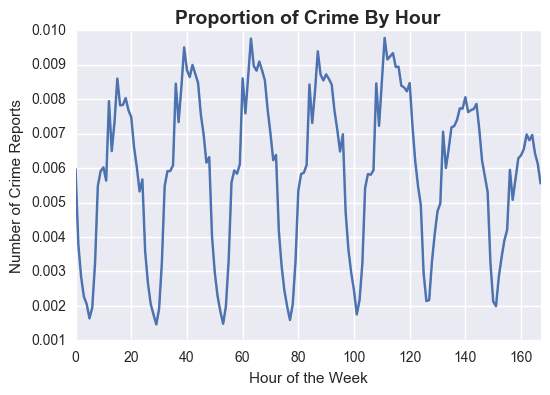

In [6]:
#Distribution by hour

hourly = sorted(pickle.load(open('hourly_freq.p','rb')),key = lambda x: x[0])
hourly = np.array([ x[1] for x in hourly ])

ax = sns.tsplot( hourly[:-1] /hourly[:-1].sum() )
ax.set_xlabel("Hour of the Week")
ax.set_ylabel("Number of Crime Reports")
ax.set_title("Proportion of Crime By Hour", fontsize=14, fontweight='bold')

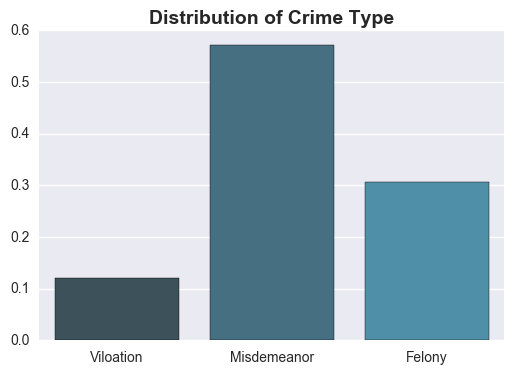

In [7]:
#Crime Category

xlabels = [z[0] for z in crime_cat] 
ylabels = np.array([z[1] for z in crime_cat])
ylabels = ylabels / ylabels.sum()
plt.title("Distribution of Crime Category",fontsize=14, fontweight='bold')

sns.barplot(x=xlabels,y=ylabels,palette= sns.color_palette("GnBu_d"))

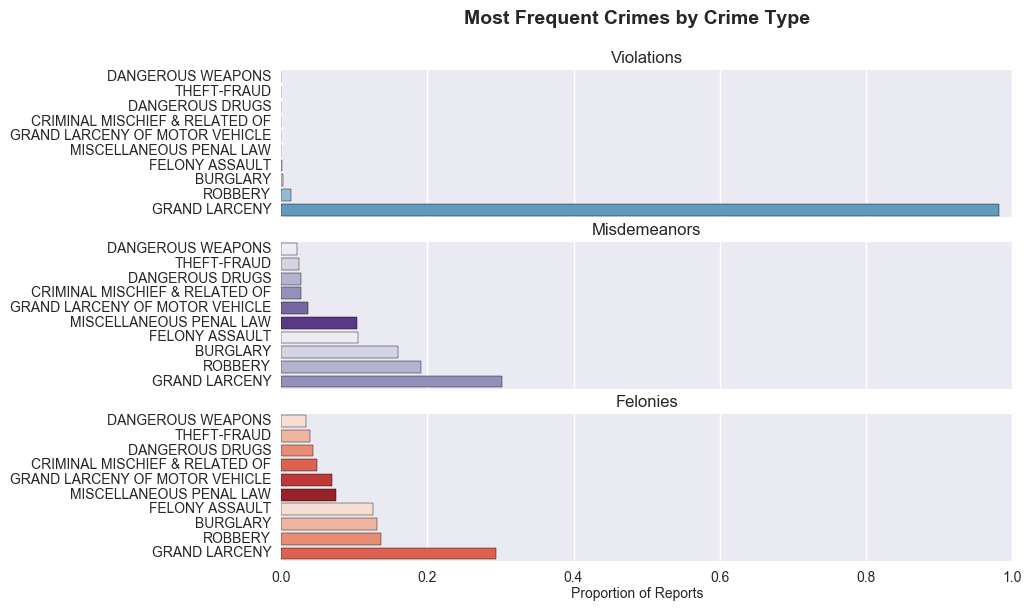

In [78]:
#Crime Type

crimes= crime_type

fig, axes = plt.subplots(nrows=3, ncols=1 , sharex=True, sharey=True,figsize=(8,6))

fig.tight_layout()

fig.suptitle('Most Frequent Crimes by Crime Type',  fontsize=14, fontweight='bold')
fig.subplots_adjust(top=0.88)
fig.text(0.5, 0.0, 'Proportion of Reports', ha='center')
axes[0].set_title('Violations')
axes[1].set_title('Misdemeanors')
axes[2].set_title('Felonies')

c = violation
c = sorted(c ,key = lambda x:x[1])[-10:]
names = [a[0] for a in c]
freq = np.array([a[1] for a in c])
freq = list(freq /freq.sum())
sns.barplot(x=freq,y=names, palette= sns.color_palette("Blues"),ax=axes[0])

c = misdem
c = sorted(c ,key = lambda x:x[1])[-10:]
names = [a[0] for a in c]
freq = np.array([a[1] for a in c])
freq = list(freq /freq.sum())
sns.barplot(x=freq,y=names, palette= sns.color_palette("Purples"),ax=axes[1])

c = felonies
c = sorted(c ,key = lambda x:x[1])[-10:]
names = [a[0] for a in c]
freq = np.array([a[1] for a in c])
freq = list(freq /freq.sum())
sns.barplot(x=freq,y=names, palette= sns.color_palette("Reds"),ax=axes[2])
